In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [3]:
FILE_NAME = '128_relu_40_adjacentTF_3e-5'

df = pd.read_csv(f'./emb/{FILE_NAME}.csv', index_col=0)
df.drop(['type'], axis=1, inplace=True)
df

0    1         2    3         4         5         6  \
MCHR1       0.000000  0.0  0.000000  0.0  0.089548  0.032872  0.000000   
PSMD9       0.000000  0.0  0.204135  0.0  0.000000  0.014524  0.125649   
CRIP1       0.000000  0.0  0.000000  0.0  0.000000  0.000000  0.011924   
GIMAP4      0.000000  0.0  0.022951  0.0  0.000000  0.024203  0.041855   
GATM        0.000000  0.0  0.000000  0.0  0.310704  0.000000  0.039978   
ZSCAN23     0.000000  0.0  0.000000  0.0  0.000000  0.000000  0.000000   
SARM1       0.009401  0.0  0.000000  0.0  0.091899  0.000000  0.000000   
KNCN        0.098453  0.0  0.016165  0.0  0.042091  0.000000  0.000000   
AC009065.1  0.000000  0.0  0.000000  0.0  0.000000  0.000000  0.000000   
TRIM16L     0.000000  0.0  0.000000  0.0  0.050921  0.000000  0.314638   

                   7         8         9  ...       118       119       120  \
MCHR1       0.000000  0.000000  0.114659  ...  0.103372  0.000000  0.065176   
PSMD9       0.000000  0.000000  0.000000  ...  0.006656  0.331512  0.104042   
CRIP1       0.000000  0.000000  0.000000  ...  0.068633  0.022548  0.001267   
GIMAP4      0.002601  0.000000  0.004182  ...  0.068726  0.022579  0.001268   
GATM        0.000000  0.244856  0.000000  ...  0.102470  0.000000  0.064607   
ZSCAN23     0.108777  0.274546  0.000000  ...  0.092712  0.000000  0.058455   
SARM1       0.000000  0.000000  0.004119  ...  0.068338  0.022452  0.001261   
KNCN        0.000000  0.000000  0.046161  ...  0.099899  0.000000  0.062986   
AC009065.1  0.000000  0.321348  0.000000  ...  0.132759  0.000000  0.083704   
TRIM16L     0.041101  0.000000  0.081102  ...  0.103510  0.000000  0.065263   

                 121       122       123       124  125       126       127  
MCHR1       0.079938  0.054336  0.157790  0.127214  0.0  0.087142  0.057871  
PSMD9       0.087714  0.000000  0.000000  0.076150  0.0  0.000000  0.000000  
CRIP1       0.040287  0.122403  0.000000  0.035159  0.0  0.000000  0.186473  
GIMAP4      0.040342  0.122569  0.000000  0.035207  0.0  0.000000  0.186725  
GATM        0.079240  0.053862  0.156413  0.126104  0.0  0.086382  0.057366  
ZSCAN23     0.071695  0.048733  0.141519  0.114096  0.0  0.078156  0.051903  
SARM1       0.040114  0.121878  0.000000  0.035008  0.0  0.000000  0.185672  
KNCN        0.077252  0.052511  0.152490  0.122940  0.0  0.084215  0.055927  
AC009065.1  0.102663  0.069783  0.202648  0.163379  0.0  0.111916  0.074323  
TRIM16L     0.080045  0.054409  0.158002  0.127384  0.0  0.087259  0.057948  

[10 rows x 128 columns]

Running TSNE...
Plotting...


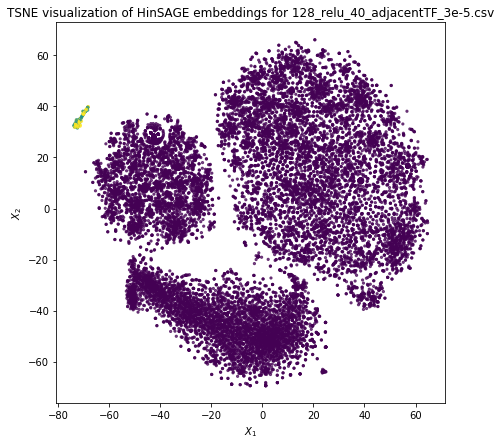

In [13]:
all_embeddings = df.to_numpy()
print('Running TSNE...')
trans = TSNE(n_components=2, random_state=0)
emb_transformed = pd.DataFrame(trans.fit_transform(all_embeddings), index=df.index)

def geneType(name):
    if name[-2:] == '_k':
        return 1
    elif name[-3:] == '_gm':
        return 2
    else:
        return 0

emb_transformed['type'] = emb_transformed.index.map(geneType)

alpha = 0.7

print('Plotting...')
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(
    emb_transformed[0],
    emb_transformed[1],
    c=emb_transformed["type"],
#     cmap="Paired",
    alpha=alpha,
    s=5
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(f"TSNE visualization of HinSAGE embeddings for {FILE_NAME}")

# plt.savefig(f'./img/full/{FILE_NAME}.png', dpi=150)
plt.show()